In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\Data Science\\Python and data structer dersleri\\python project1\\netflix1.csv")

In [3]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [4]:
df.shape

(8790, 10)

In [5]:
df.size

87900

In [6]:
missing_data = df.isnull().sum()
missing_data

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [11]:
df.date_added.head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [12]:
def convert_duration(duration):
    if 'min' in duration: # Movie
        return int(duration.split()[0])
    elif 'Season' in duration: #Tv Show
        return int(duration.split()[0]) 
    else:
        return None

In [13]:
df.duration=df.duration.apply(convert_duration)

In [14]:
print(df[['type','title', 'duration']].head())

      type                             title  duration
0    Movie              Dick Johnson Is Dead        90
1  TV Show                         Ganglands         1
2  TV Show                     Midnight Mass         1
3    Movie  Confessions of an Invisible Girl        91
4    Movie                           Sankofa       125


In [16]:
type_counts=df.type.value_counts()

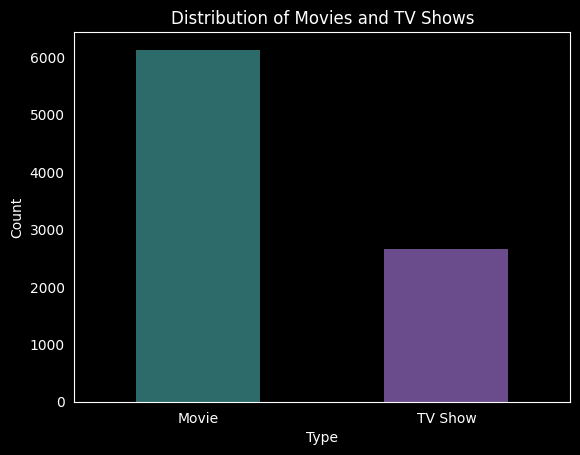

In [17]:
colors = ['#2C6B6A', '#6A4C8C']  
plt.figure(facecolor='black')
ax = type_counts.plot(kind='bar', color=colors)
ax.set_facecolor('black')

ax.spines['top'].set_color('white')  
ax.spines['right'].set_color('white') 
ax.spines['left'].set_color('white') 
ax.spines['bottom'].set_color('white') 

plt.title('Distribution of Movies and TV Shows', color='white')
plt.xlabel('Type', color='white')
plt.ylabel('Count', color='white')

plt.xticks(rotation=0, color='white')  
plt.yticks(color='white')  

plt.show()


In [18]:
top_directors=df.director.value_counts().head(10)

In [19]:
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64

In [20]:
top_directors_filtered = df[df['director'] != 'Not Given']['director'].value_counts().head(10)

In [21]:
top_directors_filtered

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Name: count, dtype: int64

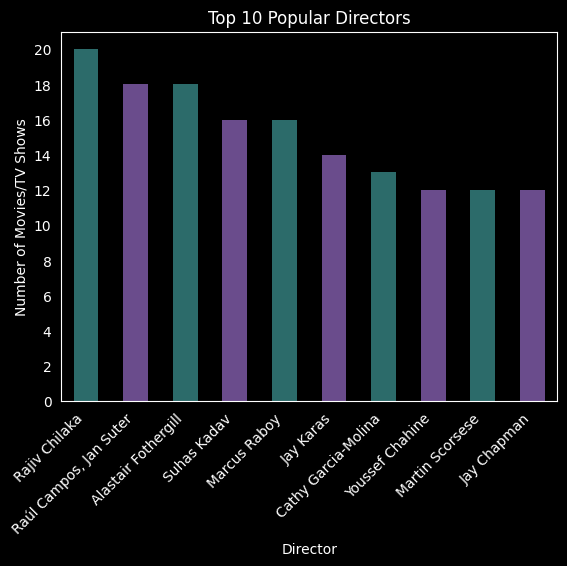

In [22]:
plt.figure(facecolor="black")
bx=top_directors_filtered.plot(kind='bar', color=colors)
bx.set_facecolor("black")
bx.spines['top'].set_color('white')
bx.spines['bottom'].set_color("white")
bx.spines["left"].set_color("white")
bx.spines['right'].set_color("white")
plt.title("Top 10 Popular Directors", color="white")
plt.xlabel("Director",color="white")
plt.ylabel("Number of Movies/TV Shows",color="white")
plt.xticks(rotation=45,ha='right', color='white')
plt.yticks(range(0,int(top_directors_filtered.max())+1,2),color='white')
plt.show()

In [23]:
top_countries=df["country"].value_counts().head(10)

In [24]:
top_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

In [25]:
top_countries_filtered=df[df.country!='Not Given']['country'].value_counts().head(10)

In [26]:
top_countries_filtered

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64

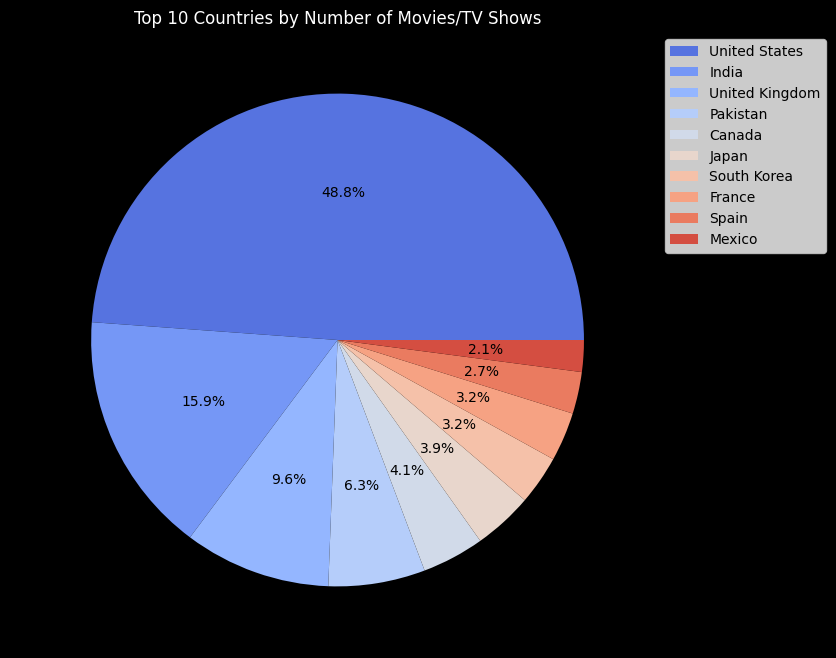

In [27]:
plt.figure(facecolor='black')
sns.set_palette('coolwarm')
cx=top_countries_filtered.plot(kind='pie',autopct='%1.1f%%', figsize=(10,8),colors=sns.color_palette('coolwarm',len(top_countries_filtered)), 
labels=top_countries_filtered.index)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=10)
plt.title("Top 10 Countries by Number of Movies/TV Shows",color='white')
plt.show()

In [28]:
yearly_trends=df['release_year'].value_counts().sort_index()

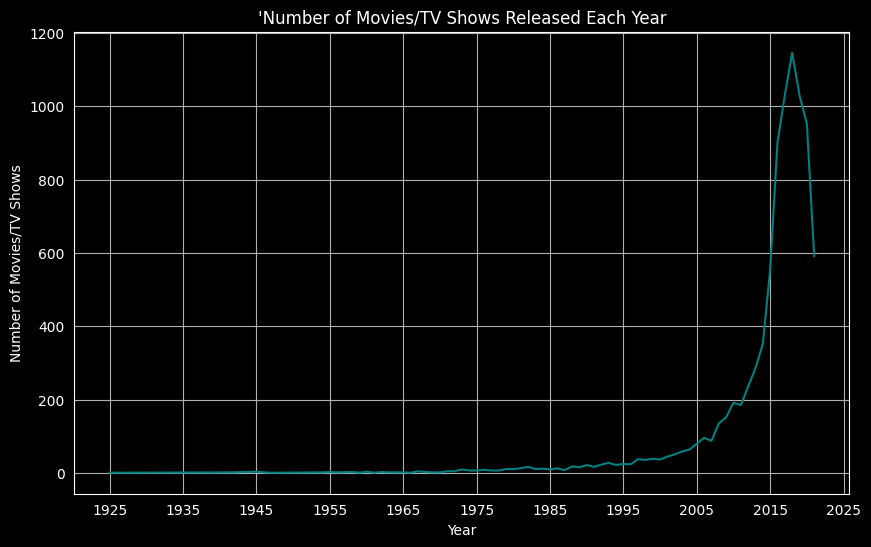

In [103]:
plt.figure(facecolor='black',figsize=(10,6))
plt.plot(yearly_trends.index,yearly_trends.values,color='teal')
plt.title("'Number of Movies/TV Shows Released Each Year",color='white')
plt.xlabel("Year",color='white')
plt.ylabel("Number of Movies/TV Shows", color='white')
plt.grid()
plt.xticks(range(1925,2030,10),color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.show()

In [30]:
all_genres=df.listed_in.str.split(',').explode().str.strip()
top_genres=all_genres.value_counts().head(10)

In [31]:
top_genres

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

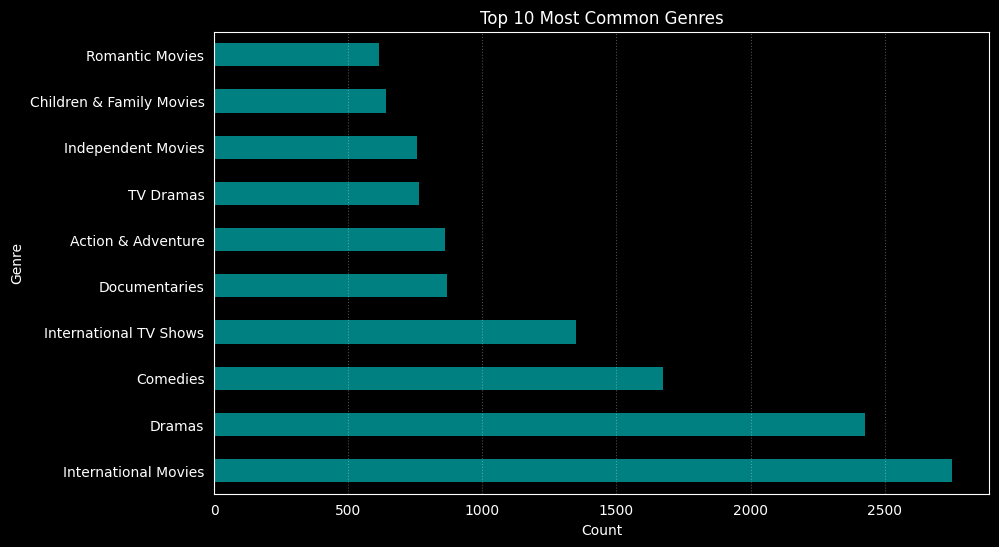

In [34]:
plt.figure(facecolor='black',figsize=(10,6))
cx=top_genres.plot(kind='barh',color='teal')
plt.title('Top 10 Most Common Genres',color='white')
plt.xlabel('Count',color='white')
plt.ylabel("Genre",color='white')
plt.xticks(color='white')
plt.yticks(color='white')
cx.set_facecolor("black")
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.grid(axis='x', color='white', linestyle=':', alpha=0.3)
plt.show()

In [111]:
grouped_data=df[df.director!="Not Given"].groupby(['director','rating']).size().reset_index(name='number_of_movies')

In [112]:
grouped_data

,director,rating,number_of_movies
0,A. L. Vijay,TV-14,2
1,A. Raajdheep,TV-14,1
2,A. Salaam,TV-14,1
3,A.R. Murugadoss,TV-14,1
4,A.R. Murugadoss,TV-MA,1
...,...,...,...
5145,Çagan Irmak,TV-14,1
5146,Ísold Uggadóttir,TV-14,1
5147,Óskar Thór Axelsson,TV-MA,1
5148,Ömer Faruk Sorak,TV-MA,2


In [75]:
grouped_data['number_of_movies'].max()

np.int64(18)

In [76]:
grouped_data[grouped_data.number_of_movies==18]

,director,rating,number_of_movies
3840,Rajiv Chilaka,TV-Y7,18
